In [23]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [24]:
import copy
import json
import math
import random
import sys
import tempfile
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
%matplotlib notebook
#import seaborn as sns; sns.set()
import time

In [25]:
for i in range(0,1000):
    for i in range(0,random.randint(0,10)):
        a=1
    

In [26]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFilter

### Global Variables

In [27]:
COLOUR_BLACK = (0, 0, 0, 255)
COLOUR_WHITE = (255, 255, 255, 255)
OFFSET = 10 #Defined so the vertices dont fall inside the figure
POLYGONS = 2 #Numero de figuras geométricas en cada cuadro
POLY_MIN_POINTS = 3
POLY_MAX_POINTS = 5
MUTATION_PROBABILITY=50
POPULATION_SIZE=2 #Numero de cuadros 
Generations=100
color_mutation=0
shape_mutation=0

In [28]:
imagen = Image.open("monalisaextrasmall.jpg")# monalisaextrasmall.jpg")

#Get image size
img_size = imagen.size

### Global Methods

In [29]:
#This method draws ALL the polygons
def drawing(colour, points, background):
        """
        paint all polygons onto an Image and show it.
        """
        size = img_size
        img = Image.new('RGB', size, background)
        draw = Image.new('RGBA', size)
        pdraw = ImageDraw.Draw(draw)
        
        for i in range(POLYGONS):
            #print(tuple(colour))
            pdraw.polygon(points[i], fill=tuple(colour[i]), outline=tuple(colour[i]))
            img.paste(draw, mask=draw)
        
        return img
def generate_colour():
    """
    generate random (r,g,b,a) colour.
    """
    red = random.randrange(0, 256)
    green = random.randrange(0, 256)
    blue = random.randrange(0, 256)
    alpha = random.randrange(0, 256)
    return (red, green, blue, alpha)
print(generate_colour())
def generate_point(width, height):
    """
    generate random (x,y) coordinates in given range (+offset).
    """
    x = random.randrange(0 - OFFSET, width + OFFSET, 1)
    y = random.randrange(0 - OFFSET, height + OFFSET, 1)
    return (x, y)
generate_point(5,5)

(179, 211, 16, 60)


(-7, -5)

### Initiate Individual

In [30]:
def generate_initial_individual():
    """
    generate dna string consisting of polygons.
    """

    (width, height) = imagen.size
    aux_population_0,aux_population_1,aux_population_2=[],[],[]

    for i in range(POLYGONS):
        polygon_type = random.randrange(POLY_MIN_POINTS, POLY_MAX_POINTS + 1)
        points = []
        
        for j in range(polygon_type):
            # generate a point (x,y) in 2D space and append it to points.
            point = generate_point(width, height)
            points.append(point)

        # generate colour (r,g,b,a) for polygon
        # colour = COLOUR_BLACK if fixed_colour else generate_colour()
        colour =COLOUR_BLACK
        aux_population_1.append(colour)
        aux_population_2.append(points)

    img = drawing( aux_population_1, aux_population_2, COLOUR_BLACK)
            
    aux_population_0.append(img)  
    return aux_population_0, aux_population_1,aux_population_2

generate_initial_individual()

([<PIL.Image.Image image mode=RGB size=100x100 at 0x111639978>],
 [(0, 0, 0, 255), (0, 0, 0, 255)],
 [[(22, 17), (9, -5), (107, 63), (47, 46)],
  [(70, 28), (31, 61), (10, 53), (66, 67), (108, 0)]])

### Initiate Population

In [31]:
def generate_initial_population():
    population = [[] for x in range(4)]
    for i in range(POPULATION_SIZE):
        aux0,aux1,aux2=generate_initial_individual()

        population[0].append(aux0)#Imagen
        population[1].append(aux1)#Color
        population[2].append(aux2)#Vertices
        population[3].append(fitness(aux0[0],imagen))#Fitness

    return population


### Calculate Fitness of the Image

In [32]:
def fitness(img_1, img_2):
    """
    fitness funtcion determines how much alike 2 images are.
    """
    fitness = 0.0
    for y in range(0, img_size[1]):
        for x in range(0, img_size[0]):
            r1, g1, b1 = img_1.getpixel((x, y))
            r2, g2, b2 = img_2.getpixel((x, y))
            # get delta per color
            d_r = r1 - r2
            d_b = b1 - b2
            d_g = g1 - g2
            
            # measure the distance between the colors in 3D space
            pixel_fitness = math.sqrt(d_r * d_r + d_g * d_g + d_b * d_b )
            # add the pixel fitness to the total fitness (lower is better)
            fitness += pixel_fitness
    return fitness
generate_initial_population()

[[[<PIL.Image.Image image mode=RGB size=100x100 at 0x111639940>],
  [<PIL.Image.Image image mode=RGB size=100x100 at 0x111639C50>]],
 [[(0, 0, 0, 255), (0, 0, 0, 255)], [(0, 0, 0, 255), (0, 0, 0, 255)]],
 [[[(91, 61), (63, 71), (-6, 25)], [(45, 48), (24, 94), (72, 51), (8, 28)]],
  [[(27, 70), (12, 84), (62, 64)], [(93, 69), (95, -3), (24, 34), (42, 3)]]],
 [1266395.54967289, 1266395.54967289]]

In [33]:
def update_params(population):
    
    for i in range(POPULATION_SIZE):
        img = drawing(population[1][i], population[2][i], COLOUR_BLACK)
        population[0][i][0]=img
        population[3][i]=fitness(population[0][i][0],imagen)

    return population


### Selection

In [34]:
def selection(poblacion):
    #Selects the best individual and returns a population just of him
    minimo=(np.array(poblacion[3])).min()
    population=[]
    population = [[] for x in range(4)]
    indice=0
    for number in poblacion[3]:
        if number==minimo:
            for i in range(POPULATION_SIZE):
                population[0].append(poblacion[0][indice])#Imagen
                population[1].append(poblacion[1][indice])#Color
                population[2].append(poblacion[2][indice])#Vertices
                population[3].append(poblacion[3][indice])#Fitness
        break

        indice=indice+1
    return population
selection(generate_initial_population())

[[[<PIL.Image.Image image mode=RGB size=100x100 at 0x11163E9E8>],
  [<PIL.Image.Image image mode=RGB size=100x100 at 0x11163E9E8>]],
 [[(0, 0, 0, 255), (0, 0, 0, 255)], [(0, 0, 0, 255), (0, 0, 0, 255)]],
 [[[(-2, 102), (53, 103), (62, 27)],
   [(74, 66), (63, 90), (48, 90), (59, 96), (60, 104)]],
  [[(-2, 102), (53, 103), (62, 27)],
   [(74, 66), (63, 90), (48, 90), (59, 96), (60, 104)]]],
 [1266395.54967289, 1266395.54967289]]

### Mutate

In [35]:
def mutate(population):#Mutates every polygon with a probability 
      
    rand_individual = random.randrange(0, POLYGONS)
    (width, height) = imagen.size
    #Once the mutation is given
    #Probability of color mutation
    # Probability of shape mutation
    for rand_polygon in range(POPULATION_SIZE):#Mutates All polygons
        
        if color_mutation>=random.random()*100:
            #We select from the population list a random polygon and withinit a random individual
            population[1][rand_polygon][rand_individual] = generate_colour()
        if shape_mutation>=random.random()*100:
            polygon_type = random.randrange(POLY_MIN_POINTS, POLY_MAX_POINTS + 1)
            points=[]
            for j in range(polygon_type):
                # generate a point (x,y) in 2D space and append it to points.
                point = generate_point(width, height)
                points.append(point)
            population[2][rand_polygon][rand_individual] = points
    return population    


print(generate_initial_population()[2])
mutate(generate_initial_population())[2]

[[[(3, 27), (27, 35), (16, 18), (104, 12), (-9, 99)], [(48, 54), (67, 20), (94, 23), (47, 40), (103, 2)]], [[(32, 61), (21, -7), (63, 18)], [(34, 38), (31, 45), (21, -2)]]]


[[[(78, 34), (109, -2), (84, 59)], [(74, 85), (60, 0), (57, 48)]],
 [[(66, 0), (90, 76), (58, 32), (43, 57)],
  [(15, 63), (4, 29), (-10, 11), (17, 78)]]]

In [36]:
s=generate_initial_population()
print(s[3])
def isbest(population):
    #This method makes sure that the population improves
    population2=copy.deepcopy(population)
    
    mutados=mutate(population) #Mutamos
    mutados=update_params(mutados)
    

    #Creamos dos variables
    minimo_original=(np.array(population2[3])).min()
    minimo_mutados=(np.array(mutados[3])).min()
    if minimo_original<=minimo_mutados:
        return population2
    else:
        return mutados
    
    
    
isbest(s)

[1266395.54967289, 1266395.54967289]


[[[<PIL.Image.Image image mode=RGB size=100x100 at 0x11163F400>],
  [<PIL.Image.Image image mode=RGB size=100x100 at 0x11163F7F0>]],
 [[(0, 0, 0, 255), (0, 0, 0, 255)], [(0, 0, 0, 255), (0, 0, 0, 255)]],
 [[[(101, -2), (95, 94), (37, 3), (39, 52)], [(25, 5), (12, 36), (1, 65)]],
  [[(20, 34), (2, 94), (88, 38)], [(106, 101), (-2, -7), (80, 90), (2, 105)]]],
 [1266395.54967289, 1266395.54967289]]

### Program



In [37]:
OFFSET = 10 #Defined so the vertices dont fall inside the figure
POLYGONS = 10 #Numero de figuras geométricas en cada cuadro
POLY_MIN_POINTS = 3
POLY_MAX_POINTS = 5
MUTATION_PROBABILITY=50
POPULATION_SIZE=5 #Numero de cuadros 
Generations=100
color_mutation=90
shape_mutation=90

In [38]:
%%time
tic=time.time()
pop=generate_initial_population()
better=[]
for i in range(0,Generations):

    
    pop=selection(pop)
    pop=isbest(pop)
    pop=update_params(pop)
    
    
    if (i%10)==0:
        
        better.append((np.array(pop[3])).max())
        print('Done {} iterations in {}s'.format(i,np.round(np.abs(tic-time.time()))))
        
toc=time.time()
print('The time elapsed is {}s'.format(np.round(np.abs(tic-toc))))

Done 0 iterations in 0.0s
Done 10 iterations in 3.0s
Done 20 iterations in 5.0s
Done 30 iterations in 8.0s
Done 40 iterations in 10.0s
Done 50 iterations in 13.0s
Done 60 iterations in 15.0s
Done 70 iterations in 17.0s
Done 80 iterations in 20.0s
Done 90 iterations in 22.0s
The time elapsed is 24.0s
CPU times: user 23.9 s, sys: 118 ms, total: 24 s
Wall time: 24.4 s


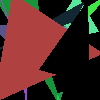

In [39]:
pop[0][0][0]

<IPython.core.display.Javascript object>


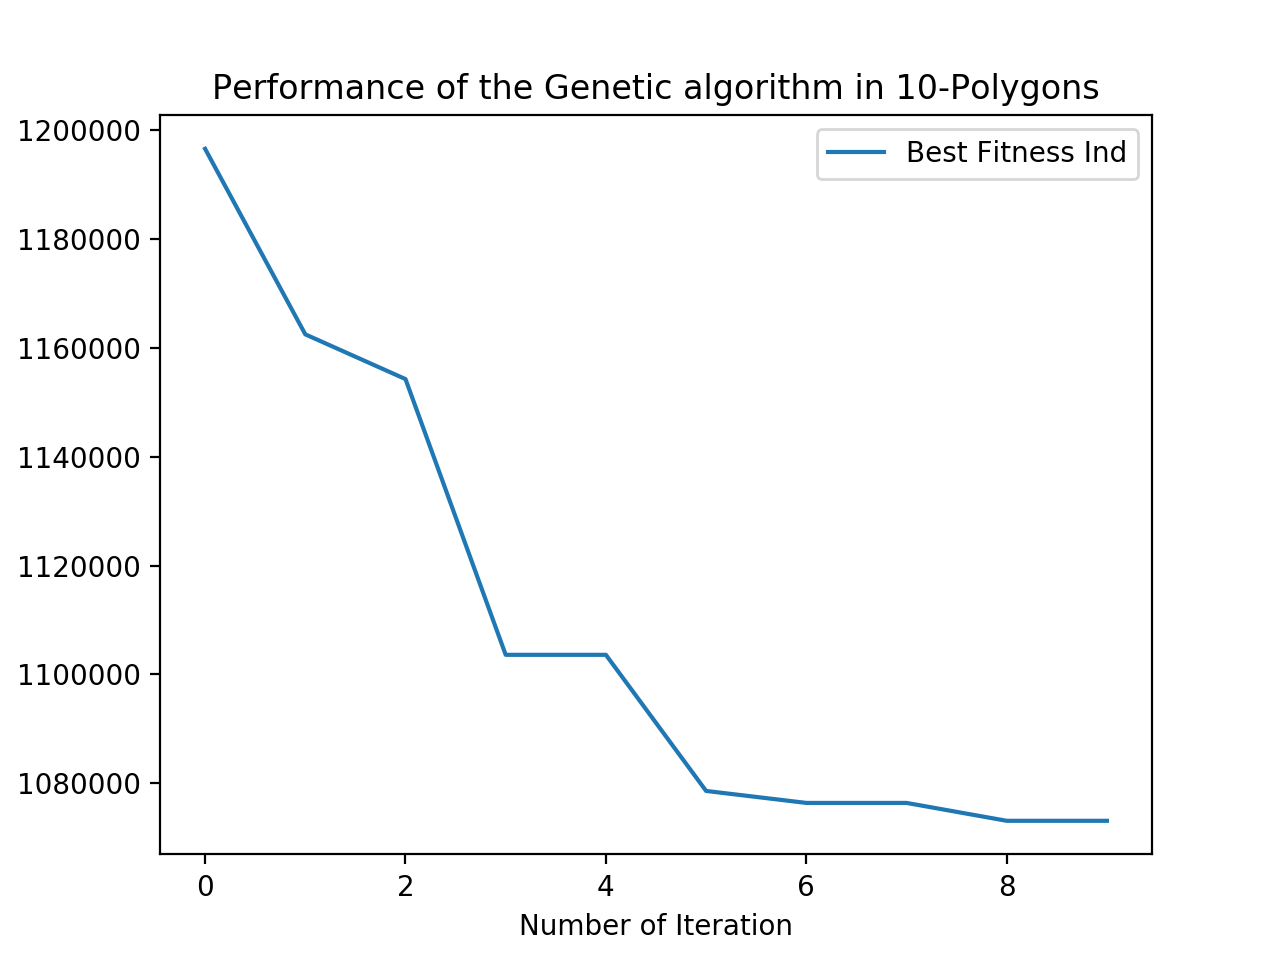

In [40]:
plt.figure()
x_index=np.array(range(0,len(better)))
plt.plot(x_index,better,label='Best Fitness Ind')
plt.ylabel('Fitness Score')
plt.xlabel('Number of Iteration')
plt.title('Performance of the Genetic algorithm in {}-Polygons'.format(POLYGONS))
plt.legend()
plt.show()